# Analysis of sold new cars in Estonia

Data is taken from official source - https://www.mnt.ee/et/ametist/statistika/soidukite-statistika

Period - from Ferbruary 2018 till Janurary 2019(due to wrong format in January 2018).

Only new cars where used in this analysis.

Special script was created to extract needed data from official xls files.

# Findings
1. 26133 cars were sold for this period.
2. ~67% petrol, ~25% diesel, ~6% hybrid cars...
3. ~24% has engine capacity of ~2.0 liters, ~16% ~1.6 liters, ~13% ~1.5 liters...
4. Most popular brands/marks in Estonia: TOYOTA, SKODA, RENAULT, VOLKSWAGEN, KIA...
5. ~42% of all cars are SUVs
6. Corporate clients buy cheaper cars with smaller engines(ex. Renault Clio), private clients buy more expensive cars with bigger engines(ex. Toyota Rav4)
7. People from different cities buy different cars.
8. People don't buy what they want, people buy what dealers have in stock
(Most popular petrol/diesel cars: TOYOTA AVENSIS, VOLKSWAGEN TIGUAN)

In [125]:
%reload_ext autoreload
%autoreload 0

import os

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [126]:
df = pd.read_csv('mnt.csv')
df.describe(include='all')

,Unnamed: 0,Kategooria,Mark,Mudel,Keretüüp,Väljalaske aasta,Mootori tüüp,Mootori maht,Mootori võimsus,CO2,Täismass,Tühimass,Telgi kokku,Istekohti,Maakond,Linn,Tüüp,Arv
count,18658.000000,18658,18658,18658,18658,18658.000000,18658,18658.000000,18658.000000,18574.000000,18658.000000,18658.000000,18658.0,18658.000000,18658,18658,18658,18658.000000
unique,NaN,2,71,531,10,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,19,4,NaN
top,NaN,M1,SKODA,OCTAVIA,UNIVERSAAL,NaN,Bensiin kat.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harju Maakond,Määramata,Füüsiline isik,NaN
freq,NaN,17368,2823,853,8490,NaN,11831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10401,7647,10865,NaN
mean,929.452889,NaN,NaN,NaN,NaN,2018.091167,NaN,1705.426144,111.042856,134.954237,2058.707203,1582.537946,2.0,5.195144,NaN,NaN,NaN,1.400632
std,493.469000,NaN,NaN,NaN,NaN,0.287855,NaN,516.052394,41.548333,27.694296,359.272528,306.442612,0.0,0.742816,NaN,NaN,NaN,2.356867
min,42.000000,NaN,NaN,NaN,NaN,2018.000000,NaN,0.000000,25.300000,0.000000,1000.000000,800.000000,2.0,2.000000,NaN,NaN,NaN,1.000000
25%,512.000000,NaN,NaN,NaN,NaN,2018.000000,NaN,1395.000000,85.000000,118.000000,1834.000000,1385.000000,2.0,5.000000,NaN,NaN,NaN,1.000000
50%,900.500000,NaN,NaN,NaN,NaN,2018.000000,NaN,1598.000000,108.000000,131.000000,2000.000000,1523.000000,2.0,5.000000,NaN,NaN,NaN,1.000000
75%,1324.000000,NaN,NaN,NaN,NaN,2018.000000,NaN,1984.000000,125.000000,150.000000,2200.000000,1706.000000,2.0,5.000000,NaN,NaN,NaN,1.000000


In [127]:
df.head()

,Unnamed: 0,Kategooria,Mark,Mudel,Keretüüp,Väljalaske aasta,Mootori tüüp,Mootori maht,Mootori võimsus,CO2,Täismass,Tühimass,Telgi kokku,Istekohti,Maakond,Linn,Tüüp,Arv
0,55,M1,ALFA ROMEO,STELVIO,UNIVERSAAL,2019.0,Bensiin kat.,1995.0,206.0,182.0,2300.0,1735.0,2.0,5.0,Harju Maakond,Määramata,Juriidiline isik,1
1,56,M1,ALFA ROMEO,STELVIO,UNIVERSAAL,2019.0,Bensiin kat.,1995.0,206.0,182.0,2300.0,1735.0,2.0,5.0,Harju Maakond,Tallinn,Füüsiline isik,1
2,57,M1,AUDI,A3 SPORTBACK,LUUKPÄRA,2019.0,Bensiin kat.,1498.0,110.0,117.0,1855.0,1430.0,2.0,5.0,Tartu Maakond,Tartu,Juriidiline isik,1
3,58,M1,AUDI,A4 ALLROAD QUATTRO,UNIVERSAAL,2019.0,Diisel,1968.0,140.0,132.0,2245.0,1833.0,2.0,5.0,Harju Maakond,Määramata,Juriidiline isik,1
4,59,M1,AUDI,A4 AVANT,UNIVERSAAL,2019.0,Bensiin hübriid,1984.0,140.0,130.0,2095.0,1565.0,2.0,5.0,Järva Maakond,Paide,Füüsiline isik,1


In [128]:
for col in "Kategooria 	Keretüüp 	Väljalaske aasta	CO2 	Täismass 	Tühimass 	Telgi kokku 	Istekohti 	Maakond".split('\t'):
    df = df.drop(columns=col.strip())

df.head()

,Unnamed: 0,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv
0,55,ALFA ROMEO,STELVIO,Bensiin kat.,1995.0,206.0,Määramata,Juriidiline isik,1
1,56,ALFA ROMEO,STELVIO,Bensiin kat.,1995.0,206.0,Tallinn,Füüsiline isik,1
2,57,AUDI,A3 SPORTBACK,Bensiin kat.,1498.0,110.0,Tartu,Juriidiline isik,1
3,58,AUDI,A4 ALLROAD QUATTRO,Diisel,1968.0,140.0,Määramata,Juriidiline isik,1
4,59,AUDI,A4 AVANT,Bensiin hübriid,1984.0,140.0,Paide,Füüsiline isik,1


# Adding additional data

In [129]:
df['model'] = df['Mark'] + ' ' + df['Mudel']

df.head()

,Unnamed: 0,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv,model
0,55,ALFA ROMEO,STELVIO,Bensiin kat.,1995.0,206.0,Määramata,Juriidiline isik,1,ALFA ROMEO STELVIO
1,56,ALFA ROMEO,STELVIO,Bensiin kat.,1995.0,206.0,Tallinn,Füüsiline isik,1,ALFA ROMEO STELVIO
2,57,AUDI,A3 SPORTBACK,Bensiin kat.,1498.0,110.0,Tartu,Juriidiline isik,1,AUDI A3 SPORTBACK
3,58,AUDI,A4 ALLROAD QUATTRO,Diisel,1968.0,140.0,Määramata,Juriidiline isik,1,AUDI A4 ALLROAD QUATTRO
4,59,AUDI,A4 AVANT,Bensiin hübriid,1984.0,140.0,Paide,Füüsiline isik,1,AUDI A4 AVANT


In [130]:
# taken from https://www.auto24.ee/new/list.php?d[class]=8,9,11&d[type]=0&d[fuel_id]=0&d[transmission_id]=0&d[drives_id]=0&d[start]=0
SUVS = 'stelvio q2 q3 q5 q7 q8 x1 x2 x3 x4 x5 x6 escalade xt5 aircross duster fullback ecosport edge kuga ranger cr-v hr-v cross kona santa tucson d-max cherokee compass renegade niro sorento sportage stonic nx rx cx g-klass gla glc gle gls x-klass countryman asx l200 outlander pajero juke navara qashqai x-trail grandland mokka 2008 3008 5008 cayenne macan alaskan captur kadjar koleos arona ateca karoq kodiaq rexton forester xv jimny sx4 vitara c-hr hilux cruiser rav4 amarok t-roc tiguan toureg xc40 xc60 xc90'.split()

df['SUV'] = df['Mudel'].apply(
    lambda x: any([suv.lower() in x.lower() for suv in SUVS])
)

df.head()

,Unnamed: 0,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv,model,SUV
0,55,ALFA ROMEO,STELVIO,Bensiin kat.,1995.0,206.0,Määramata,Juriidiline isik,1,ALFA ROMEO STELVIO,True
1,56,ALFA ROMEO,STELVIO,Bensiin kat.,1995.0,206.0,Tallinn,Füüsiline isik,1,ALFA ROMEO STELVIO,True
2,57,AUDI,A3 SPORTBACK,Bensiin kat.,1498.0,110.0,Tartu,Juriidiline isik,1,AUDI A3 SPORTBACK,False
3,58,AUDI,A4 ALLROAD QUATTRO,Diisel,1968.0,140.0,Määramata,Juriidiline isik,1,AUDI A4 ALLROAD QUATTRO,False
4,59,AUDI,A4 AVANT,Bensiin hübriid,1984.0,140.0,Paide,Füüsiline isik,1,AUDI A4 AVANT,False


In [131]:
from decimal import *

def round(number, digit=0):
    return float(Decimal(number).quantize(Decimal(str(1/10**digit)), ROUND_HALF_UP))

df['full model'] = df['Mark'] + ' ' + df['Mudel'] + '(' \
              + df['Mootori tüüp'].map(lambda x: x.replace('kat.', '').strip()).map(str) + ', ' \
              + df['Mootori maht'].map(lambda x: round(x / 1000, 1)).map(str) + ' cm3, ' \
              + df['Mootori võimsus'].map(lambda x: int(x)).map(str) + ' kW)'
df.head()

,Unnamed: 0,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv,model,SUV,full model
0,55,ALFA ROMEO,STELVIO,Bensiin kat.,1995.0,206.0,Määramata,Juriidiline isik,1,ALFA ROMEO STELVIO,True,"ALFA ROMEO STELVIO(Bensiin, 2.0 cm3, 206 kW)"
1,56,ALFA ROMEO,STELVIO,Bensiin kat.,1995.0,206.0,Tallinn,Füüsiline isik,1,ALFA ROMEO STELVIO,True,"ALFA ROMEO STELVIO(Bensiin, 2.0 cm3, 206 kW)"
2,57,AUDI,A3 SPORTBACK,Bensiin kat.,1498.0,110.0,Tartu,Juriidiline isik,1,AUDI A3 SPORTBACK,False,"AUDI A3 SPORTBACK(Bensiin, 1.5 cm3, 110 kW)"
3,58,AUDI,A4 ALLROAD QUATTRO,Diisel,1968.0,140.0,Määramata,Juriidiline isik,1,AUDI A4 ALLROAD QUATTRO,False,"AUDI A4 ALLROAD QUATTRO(Diisel, 2.0 cm3, 140 kW)"
4,59,AUDI,A4 AVANT,Bensiin hübriid,1984.0,140.0,Paide,Füüsiline isik,1,AUDI A4 AVANT,False,"AUDI A4 AVANT(Bensiin hübriid, 2.0 cm3, 140 kW)"


# Total sold cars

In [132]:
df['Arv'].sum()

26133

# Popular fuels

                   Arv
Mootori tüüp          
Bensiin kat.     17556
Diisel            6532
Bensiin hübriid   1549
Bensiin            307
Diisel hübriid      95
Elekter             91
Surugaas (CNG)       3


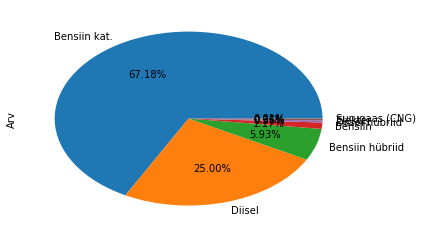

In [133]:
def show_pie(dataframe, groupby, index = None):
    dataframe = dataframe.groupby(
        [groupby], 
        as_index=False
    )['Arv'].sum().sort_values('Arv', ascending=False).reset_index(drop=True)
    if index:
        dataframe.index = index
    else:
        dataframe = dataframe.set_index(groupby)
    dataframe['Arv'].plot.pie(autopct='%1.2f%%')
    print(dataframe)

show_pie(df, 'Mootori tüüp')

# Engine capacities

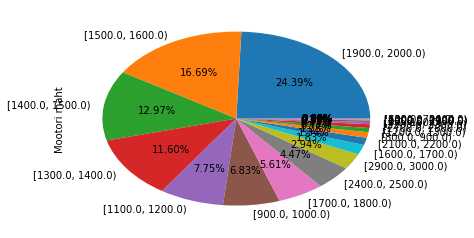

In [134]:
bins = np.linspace(0, 3000, 31, endpoint=True)
capacities = pd.cut(df['Mootori maht'], bins, right=False).value_counts()
capacities.plot(kind='pie', autopct='%1.2f%%')
None

# Top 10 popular manufacturers

Two charts might be displayed:
* 'model' - data is grouped by mark and model
* 'full model' - data is grouped by mark, model and engine

          Mark   Arv
1       TOYOTA  3894
2        SKODA  3149
3      RENAULT  2793
4   VOLKSWAGEN  1908
5          KIA  1738
6      PEUGEOT  1233
7        HONDA  1154
8      CITROEN  1103
9        DACIA  1051
10        OPEL  1016


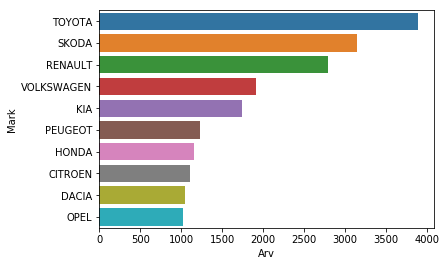

In [135]:
LIMIT = 10

def group_and_sort(data_frame, selection):
    return data_frame.groupby(
        selection, 
        as_index=False
    )['Arv'].sum().sort_values('Arv', ascending=False).reset_index(drop=True)

def group_sort_and_plot(data_frame, selection, x='Arv', y=None, limit=LIMIT, plot=True):
    data = group_and_sort(data_frame, selection)
    data.index += 1 
    y = selection[0] if y is None else y
    if plot:
        sns.barplot(x, y, data=data[:limit], orient='h')
    print(data.head(limit))
    
group_sort_and_plot(df, ['Mark'])

## Top 10 popular car models

             model   Arv
1     RENAULT CLIO  1016
2    SKODA OCTAVIA   994
3      TOYOTA RAV4   934
4   TOYOTA AVENSIS   710
5     KIA SPORTAGE   665
6     TOYOTA AURIS   625
7     SKODA SUPERB   615
8      TOYOTA C-HR   601
9   RENAULT CAPTUR   593
10        KIA CEED   576


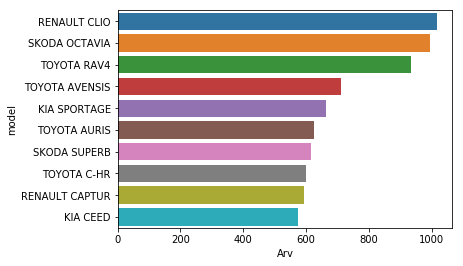

In [136]:
group_sort_and_plot(df, ['model'])

                                       full model  Arv
1        TOYOTA AVENSIS(Bensiin, 1.8 cm3, 108 kW)  641
2           RENAULT CLIO(Bensiin, 1.1 cm3, 54 kW)  515
3           TOYOTA RAV4(Bensiin, 2.0 cm3, 112 kW)  463
4   TOYOTA RAV4(Bensiin hübriid, 2.5 cm3, 114 kW)  452
5        SUBARU OUTBACK(Bensiin, 2.5 cm3, 129 kW)  418
6           TOYOTA AURIS(Bensiin, 1.6 cm3, 97 kW)  411
7    TOYOTA C-HR(Bensiin hübriid, 1.8 cm3, 72 kW)  398
8         NISSAN QASHQAI(Bensiin, 1.2 cm3, 85 kW)  393
9         TOYOTA COROLLA(Bensiin, 1.6 cm3, 97 kW)  361
10        RENAULT CAPTUR(Bensiin, 0.9 cm3, 66 kW)  312


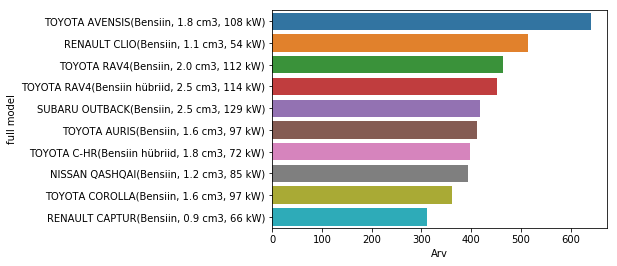

In [137]:
group_sort_and_plot(df, ['full model'])

### Top 10 popular diesel models

                model  Arv
1        KIA SPORTAGE  385
2   VOLKSWAGEN TIGUAN  294
3        SKODA KODIAQ  288
4        DACIA DUSTER  220
5       SKODA OCTAVIA  204
6    CITROEN BERLINGO  199
7        PEUGEOT 3008  197
8        SKODA SUPERB  195
9       TOYOTA PROACE  175
10       PEUGEOT 5008  166


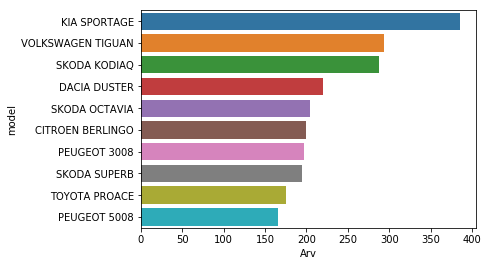

In [138]:
df_diesel = df[df['Mootori tüüp'] == 'Diisel']

group_sort_and_plot(df_diesel, ['model'])

                                          full model  Arv
1         VOLKSWAGEN TIGUAN(Diisel, 2.0 cm3, 110 kW)  266
2              SKODA KODIAQ(Diisel, 2.0 cm3, 110 kW)  196
3               DACIA DUSTER(Diisel, 1.5 cm3, 80 kW)  161
4   TOYOTA LAND CRUISER 150(Diisel, 2.8 cm3, 130 kW)  140
5              KIA SPORTAGE(Diisel, 2.0 cm3, 136 kW)  139
6              SKODA OCTAVIA(Diisel, 1.6 cm3, 85 kW)  119
7              SKODA SUPERB(Diisel, 2.0 cm3, 110 kW)  110
8                SKODA KAROQ(Diisel, 1.6 cm3, 85 kW)  101
9                  KIA CEED(Diisel, 1.6 cm3, 100 kW)  100
10               VOLVO XC90(Diisel, 2.0 cm3, 173 kW)   96


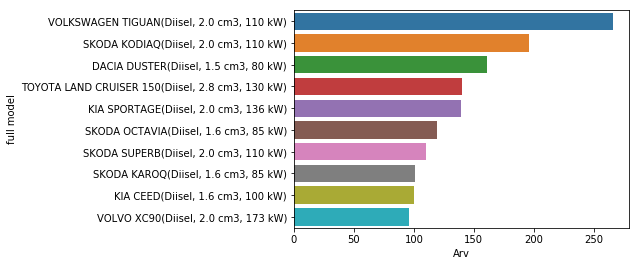

In [139]:
group_sort_and_plot(df_diesel, ['full model'])

### Top 10 popular petrol models

              model  Arv
1     SKODA OCTAVIA  755
2      RENAULT CLIO  751
3    TOYOTA AVENSIS  688
4    RENAULT CAPTUR  582
5       TOYOTA RAV4  467
6    NISSAN QASHQAI  467
7   VOLKSWAGEN GOLF  447
8          KIA CEED  433
9    SUBARU OUTBACK  418
10     SKODA SUPERB  418


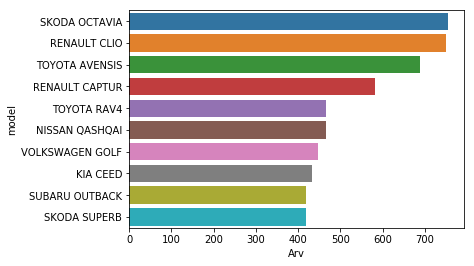

In [140]:
df_petrol = df[df['Mootori tüüp'] == 'Bensiin kat.']

group_sort_and_plot(df_petrol, ['model'])

                                  full model  Arv
1   TOYOTA AVENSIS(Bensiin, 1.8 cm3, 108 kW)  641
2      RENAULT CLIO(Bensiin, 1.1 cm3, 54 kW)  515
3      TOYOTA RAV4(Bensiin, 2.0 cm3, 112 kW)  463
4   SUBARU OUTBACK(Bensiin, 2.5 cm3, 129 kW)  418
5      TOYOTA AURIS(Bensiin, 1.6 cm3, 97 kW)  411
6    NISSAN QASHQAI(Bensiin, 1.2 cm3, 85 kW)  393
7    TOYOTA COROLLA(Bensiin, 1.6 cm3, 97 kW)  361
8    RENAULT CAPTUR(Bensiin, 0.9 cm3, 66 kW)  312
9        HONDA HR-V(Bensiin, 1.5 cm3, 96 kW)  308
10    DACIA SANDERO(Bensiin, 0.9 cm3, 66 kW)  298


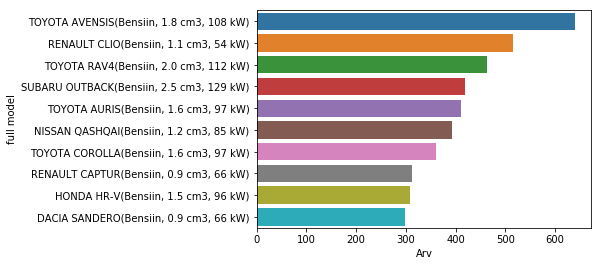

In [141]:
group_sort_and_plot(df_petrol, ['full model'])

### Top 10 popular hybrid models(diesel and petrol)


                  model  Arv
1           TOYOTA RAV4  465
2           TOYOTA C-HR  398
3          TOYOTA AURIS  205
4   TOYOTA YARIS HYBRID  111
5              KIA NIRO   69
6          LEXUS NX300H   67
7          LEXUS RX450H   43
8               AUDI Q8   39
9         HYUNDAI IONIQ   35
10              AUDI Q7   32


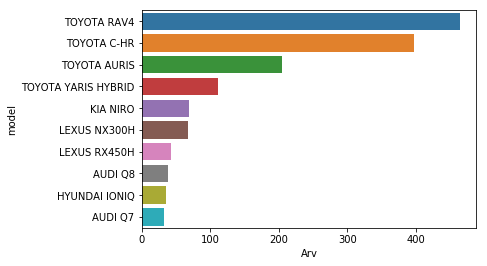

In [142]:
df_hybrids = df[df['Mootori tüüp'].apply(lambda x: 'hübriid' in x)]

group_sort_and_plot(df_hybrids, ['model'])

                                           full model  Arv
1       TOYOTA RAV4(Bensiin hübriid, 2.5 cm3, 114 kW)  452
2        TOYOTA C-HR(Bensiin hübriid, 1.8 cm3, 72 kW)  398
3       TOYOTA AURIS(Bensiin hübriid, 1.8 cm3, 73 kW)  205
4   TOYOTA YARIS HYBRID(Bensiin hübriid, 1.5 cm3, ...  111
5           KIA NIRO(Bensiin hübriid, 1.6 cm3, 77 kW)   69
6      LEXUS NX300H(Bensiin hübriid, 2.5 cm3, 114 kW)   67
7      LEXUS RX450H(Bensiin hübriid, 3.5 cm3, 193 kW)   43
8            AUDI Q8(Diisel hübriid, 3.0 cm3, 210 kW)   39
9      HYUNDAI IONIQ(Bensiin hübriid, 1.6 cm3, 77 kW)   35
10           AUDI Q7(Diisel hübriid, 3.0 cm3, 210 kW)   25


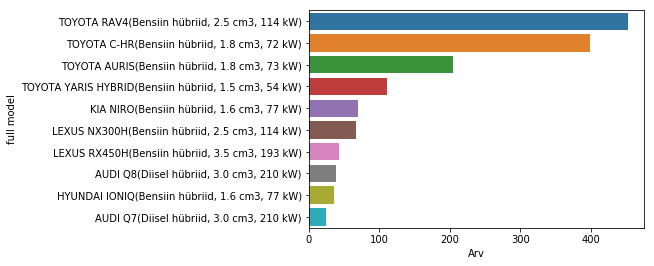

In [143]:
group_sort_and_plot(df_hybrids, ['full model'])

### Top 10 popular cars by private owners

                model  Arv
1         TOYOTA RAV4  585
2       SKODA OCTAVIA  465
3        KIA SPORTAGE  381
4         TOYOTA C-HR  347
5        SKODA SUPERB  326
6   VOLKSWAGEN TIGUAN  323
7        SKODA KODIAQ  308
8         SKODA KAROQ  307
9      TOYOTA AVENSIS  304
10           KIA CEED  295


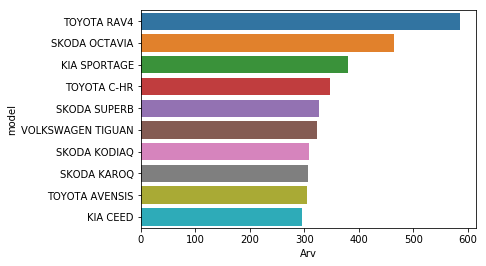

In [144]:
df_private = df[df['Tüüp'].apply(lambda x: 'Füüsiline' in x)]

group_sort_and_plot(df_private, ['model'])

                                       full model  Arv
1   TOYOTA RAV4(Bensiin hübriid, 2.5 cm3, 114 kW)  294
2           TOYOTA RAV4(Bensiin, 2.0 cm3, 112 kW)  288
3        TOYOTA AVENSIS(Bensiin, 1.8 cm3, 108 kW)  258
4        SUBARU OUTBACK(Bensiin, 2.5 cm3, 129 kW)  228
5         NISSAN QASHQAI(Bensiin, 1.2 cm3, 85 kW)  226
6         TOYOTA COROLLA(Bensiin, 1.6 cm3, 97 kW)  212
7           TOYOTA AURIS(Bensiin, 1.6 cm3, 97 kW)  199
8    TOYOTA C-HR(Bensiin hübriid, 1.8 cm3, 72 kW)  191
9      VOLKSWAGEN TIGUAN(Diisel, 2.0 cm3, 110 kW)  182
10           HONDA CR-V(Bensiin, 2.0 cm3, 114 kW)  165


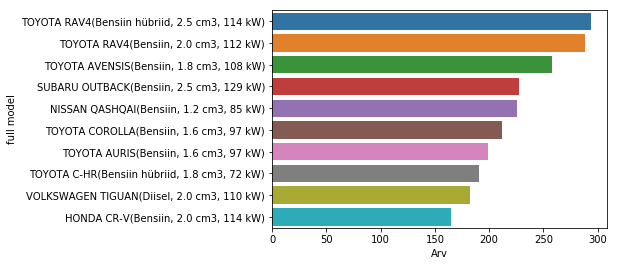

In [145]:
group_sort_and_plot(df_private, ['full model'])

### Top 10 popular cars by company owners

                model  Arv
1        RENAULT CLIO  977
2       SKODA OCTAVIA  529
3      RENAULT CAPTUR  516
4    CITROEN BERLINGO  433
5      TOYOTA AVENSIS  406
6         TOYOTA RAV4  349
7        TOYOTA AURIS  334
8   VOLKSWAGEN PASSAT  334
9        SKODA SUPERB  289
10       KIA SPORTAGE  284


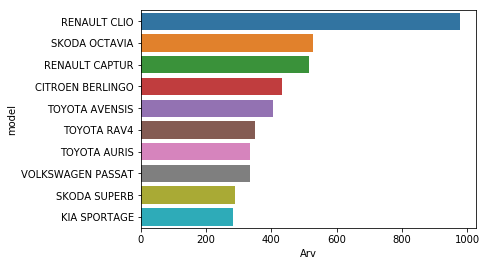

In [146]:
df_corporate = df[df['Tüüp'].apply(lambda x: 'Füüsiline' not in x)]

group_sort_and_plot(df_corporate, ['model'])

                                      full model  Arv
1          RENAULT CLIO(Bensiin, 1.1 cm3, 54 kW)  498
2       TOYOTA AVENSIS(Bensiin, 1.8 cm3, 108 kW)  383
3        RENAULT CAPTUR(Bensiin, 0.9 cm3, 66 kW)  304
4      CITROEN BERLINGO(Bensiin, 1.2 cm3, 81 kW)  256
5         DACIA SANDERO(Bensiin, 0.9 cm3, 66 kW)  249
6          TOYOTA AURIS(Bensiin, 1.6 cm3, 97 kW)  212
7        RENAULT CAPTUR(Bensiin, 1.2 cm3, 87 kW)  210
8   TOYOTA C-HR(Bensiin hübriid, 1.8 cm3, 72 kW)  207
9       SUBARU OUTBACK(Bensiin, 2.5 cm3, 129 kW)  190
10          PEUGEOT 308(Bensiin, 1.2 cm3, 96 kW)  189


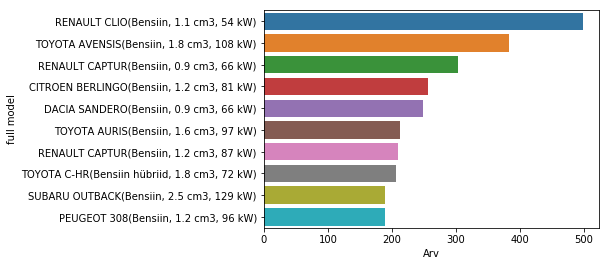

In [147]:
group_sort_and_plot(df_corporate, ['full model'])

### SUV vs non SUV

           SUV    Arv
non-SUV  False  15220
SUV       True  10913


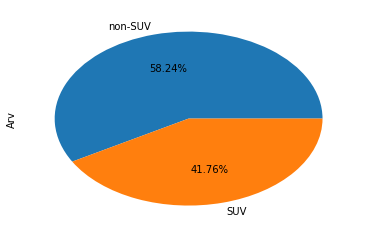

In [148]:
show_pie(df, 'SUV', index=['non-SUV', 'SUV'])

### Popular fuels in SUV

                  Arv
Mootori tüüp         
Bensiin kat.     6490
Diisel           3260
Bensiin hübriid  1075
Diisel hübriid     72
Bensiin            12
Elekter             4


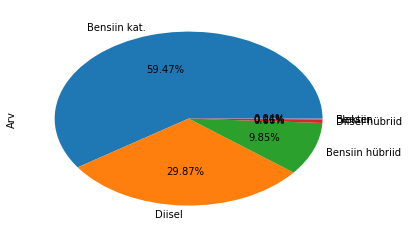

In [149]:
df_suv = df[
    df['Mudel'].apply(
        lambda x: any([suv.lower() in x.lower() for suv in SUVS])
    )
]

show_pie(df_suv, 'Mootori tüüp')

### Top 10 popular SUV

                model  Arv
1         TOYOTA RAV4  934
2        KIA SPORTAGE  665
3         TOYOTA C-HR  601
4      RENAULT CAPTUR  593
5        SKODA KODIAQ  545
6      NISSAN QASHQAI  501
7   VOLKSWAGEN TIGUAN  472
8         SKODA KAROQ  395
9        DACIA DUSTER  388
10     RENAULT KADJAR  382


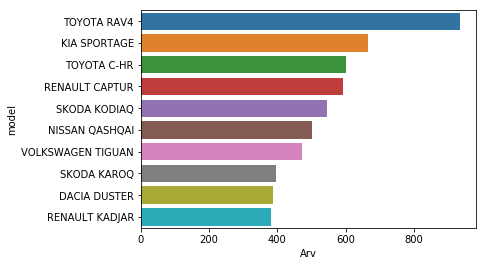

In [150]:
group_sort_and_plot(df_suv, ['model'])

                                       full model  Arv
1           TOYOTA RAV4(Bensiin, 2.0 cm3, 112 kW)  463
2   TOYOTA RAV4(Bensiin hübriid, 2.5 cm3, 114 kW)  452
3    TOYOTA C-HR(Bensiin hübriid, 1.8 cm3, 72 kW)  398
4         NISSAN QASHQAI(Bensiin, 1.2 cm3, 85 kW)  393
5         RENAULT CAPTUR(Bensiin, 0.9 cm3, 66 kW)  312
6             HONDA HR-V(Bensiin, 1.5 cm3, 96 kW)  308
7         RENAULT CAPTUR(Bensiin, 1.2 cm3, 87 kW)  268
8      VOLKSWAGEN TIGUAN(Diisel, 2.0 cm3, 110 kW)  266
9         RENAULT KADJAR(Bensiin, 1.2 cm3, 96 kW)  244
10           TOYOTA C-HR(Bensiin, 1.2 cm3, 85 kW)  203


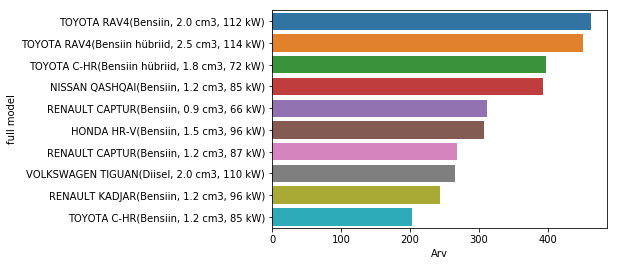

In [151]:
group_sort_and_plot(df_suv, ['full model'])

### Top 10 popular Diesel SUV

                      model  Arv
1              KIA SPORTAGE  385
2         VOLKSWAGEN TIGUAN  294
3              SKODA KODIAQ  288
4              DACIA DUSTER  220
5              PEUGEOT 3008  197
6              PEUGEOT 5008  166
7               SKODA KAROQ  142
8   TOYOTA LAND CRUISER 150  140
9            NISSAN X-TRAIL  137
10               VOLVO XC90   97


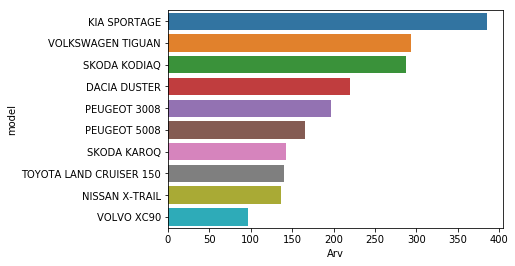

In [152]:
df_diesel_suv = df_diesel[
    df_diesel['Mudel'].apply(
        lambda x: any([suv.lower() in x.lower() for suv in SUVS])
    )
]

group_sort_and_plot(df_diesel_suv, ['model'])

                                          full model  Arv
1         VOLKSWAGEN TIGUAN(Diisel, 2.0 cm3, 110 kW)  266
2              SKODA KODIAQ(Diisel, 2.0 cm3, 110 kW)  196
3               DACIA DUSTER(Diisel, 1.5 cm3, 80 kW)  161
4   TOYOTA LAND CRUISER 150(Diisel, 2.8 cm3, 130 kW)  140
5              KIA SPORTAGE(Diisel, 2.0 cm3, 136 kW)  139
6                SKODA KAROQ(Diisel, 1.6 cm3, 85 kW)  101
7                VOLVO XC90(Diisel, 2.0 cm3, 173 kW)   96
8               PEUGEOT 3008(Diisel, 1.5 cm3, 96 kW)   88
9              SKODA KODIAQ(Diisel, 2.0 cm3, 140 kW)   84
10              PEUGEOT 5008(Diisel, 1.5 cm3, 96 kW)   83


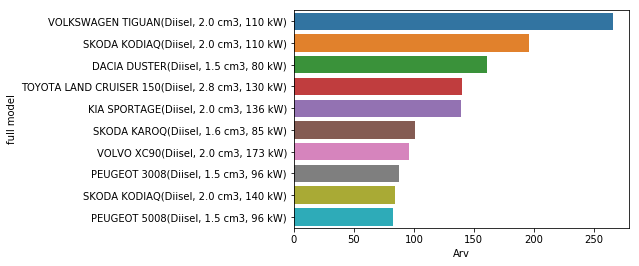

In [153]:
group_sort_and_plot(df_diesel_suv, ['full model'])

### Top 10 popular Petrol SUV

             model  Arv
1   RENAULT CAPTUR  582
2   NISSAN QASHQAI  467
3      TOYOTA RAV4  467
4   RENAULT KADJAR  348
5       HONDA HR-V  308
6       HONDA CR-V  286
7     KIA SPORTAGE  280
8     SKODA KODIAQ  257
9      SKODA KAROQ  253
10  HYUNDAI TUCSON  240


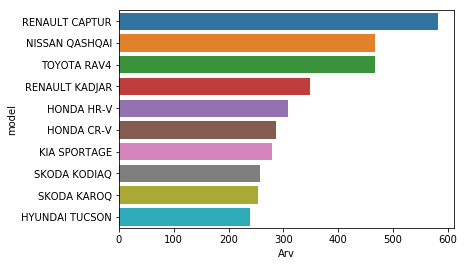

In [154]:
df_petrol_suv = df_petrol[
    df_petrol['Mudel'].apply(
        lambda x: any([suv.lower() in x.lower() for suv in SUVS])
    )
]

group_sort_and_plot(df_petrol_suv, ['model'])

                                  full model  Arv
1      TOYOTA RAV4(Bensiin, 2.0 cm3, 112 kW)  463
2    NISSAN QASHQAI(Bensiin, 1.2 cm3, 85 kW)  393
3    RENAULT CAPTUR(Bensiin, 0.9 cm3, 66 kW)  312
4        HONDA HR-V(Bensiin, 1.5 cm3, 96 kW)  308
5    RENAULT CAPTUR(Bensiin, 1.2 cm3, 87 kW)  268
6    RENAULT KADJAR(Bensiin, 1.2 cm3, 96 kW)  244
7       TOYOTA C-HR(Bensiin, 1.2 cm3, 85 kW)  203
8     SUZUKI VITARA(Bensiin, 1.6 cm3, 88 kW)  199
9       HONDA CR-V(Bensiin, 2.0 cm3, 114 kW)  195
10  HYUNDAI TUCSON(Bensiin, 1.6 cm3, 130 kW)  162


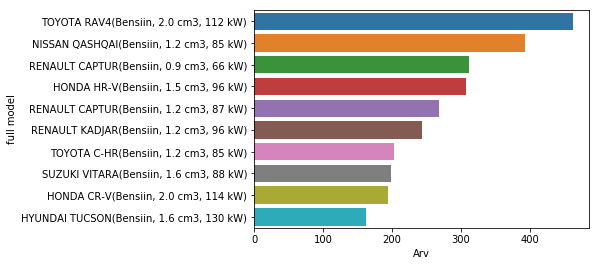

In [155]:
group_sort_and_plot(df_petrol_suv, ['full model'])

### Top 10 popular hybrid SUV

                        model  Arv
1                 TOYOTA RAV4  465
2                 TOYOTA C-HR  398
3                    KIA NIRO   69
4                LEXUS NX300H   67
5                LEXUS RX450H   43
6                     AUDI Q8   39
7                     AUDI Q7   32
8               LEXUS RX450HL   11
9    PORSCHE CAYENNE E-HYBRID    7
10  VOLVO XC90 T8 TWIN ENGINE    5


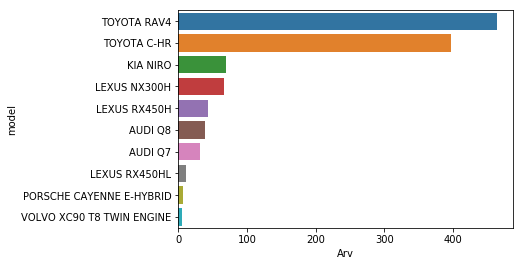

In [156]:
df_hybrid_suv = df_hybrids[
    df_hybrids['Mudel'].apply(
        lambda x: any([suv.lower() in x.lower() for suv in SUVS])
    )
]

group_sort_and_plot(df_hybrid_suv, ['model'])

                                         full model  Arv
1     TOYOTA RAV4(Bensiin hübriid, 2.5 cm3, 114 kW)  452
2      TOYOTA C-HR(Bensiin hübriid, 1.8 cm3, 72 kW)  398
3         KIA NIRO(Bensiin hübriid, 1.6 cm3, 77 kW)   69
4    LEXUS NX300H(Bensiin hübriid, 2.5 cm3, 114 kW)   67
5    LEXUS RX450H(Bensiin hübriid, 3.5 cm3, 193 kW)   43
6          AUDI Q8(Diisel hübriid, 3.0 cm3, 210 kW)   39
7          AUDI Q7(Diisel hübriid, 3.0 cm3, 210 kW)   25
8     TOYOTA RAV4(Bensiin hübriid, 2.5 cm3, 131 kW)   13
9   LEXUS RX450HL(Bensiin hübriid, 3.5 cm3, 193 kW)   11
10         AUDI Q7(Diisel hübriid, 3.0 cm3, 170 kW)    7


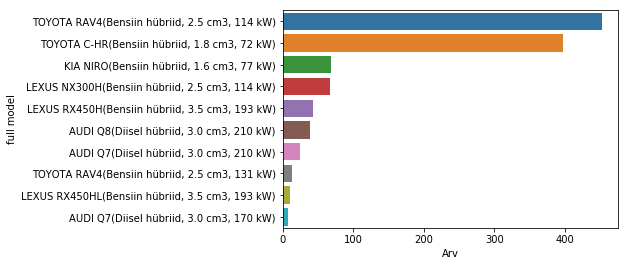

In [157]:
group_sort_and_plot(df_hybrid_suv, ['full model'])

### Most popular models per city

In [158]:
# Popular car per each city
data = df
data.replace('Narva- Jõesuu','Narva-Jõesuu', inplace=True)
cities = set(data['Linn'].tolist())

for city in cities:
    print()
    print(city)
    group_sort_and_plot(data[data['Linn'] == city], ['full model'], limit=3, plot=False)



Narva-Jõesuu
                                      full model  Arv
1          TOYOTA RAV4(Bensiin, 2.0 cm3, 112 kW)    2
2  TOYOTA RAV4(Bensiin hübriid, 2.5 cm3, 114 kW)    2
3           PEUGEOT 5008(Diisel, 1.5 cm3, 96 kW)    2

Kohtla-Järve
                              full model  Arv
1  SKODA KODIAQ(Diisel, 2.0 cm3, 110 kW)    8
2  KIA SPORTAGE(Bensiin, 1.6 cm3, 97 kW)    8
3  TOYOTA RAV4(Bensiin, 2.0 cm3, 112 kW)    7

Määramata
                                  full model  Arv
1      RENAULT CLIO(Bensiin, 1.1 cm3, 54 kW)  503
2    RENAULT CAPTUR(Bensiin, 0.9 cm3, 66 kW)  275
3  CITROEN BERLINGO(Bensiin, 1.2 cm3, 81 kW)  257

Pärnu
                               full model  Arv
1     SEAT LEON(Bensiin, 2.0 cm3, 221 kW)   87
2  SEAT LEON ST(Bensiin, 2.0 cm3, 221 kW)   83
3  SEAT LEON ST(Bensiin, 1.8 cm3, 132 kW)   32

Haapsalu
                                      full model  Arv
1        TOYOTA COROLLA(Bensiin, 1.6 cm3, 97 kW)   34
2          TOYOTA AURIS(Bensiin, 1.6 cm3, 97 kW)

# Top 3 for each mark

In [159]:
marks = ['ALFA ROMEO', 'ALPINE', 'ASTON MARTIN', 
         'AUDI', 'BENTLEY', 'BMW', 'BMW I', 
         'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'CITROEN', 
         'DACIA', 'DODGE', 'DS', 'FERRARI', 'FIAT', 'FORD', 
         'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA', 
         'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LOTUS', 'MASERATI', 
         'MAZDA', 'MERCEDES-AMG', 'MERCEDES-BENZ', 'MINI', 
         'MITSUBISHI', 'NISSAN', 'OPEL', 'PEUGEOT', 
         'PORSCHE', 'RENAULT', 'SEAT', 'SKODA', 'SSANGYONG', 
         'SUBARU', 'SUZUKI', 'TESLA MOTORS', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO']

for mark in marks:
    models = df[df['Mark'] == mark]
    print("Top 3 {} models".format(mark))
    group_sort_and_plot(models, ['full model'], limit=3, plot=False)
    print()


Top 3 ALFA ROMEO models
                                     full model  Arv
1   ALFA ROMEO GIULIA(Bensiin, 2.0 cm3, 206 kW)    6
2  ALFA ROMEO STELVIO(Bensiin, 2.0 cm3, 206 kW)    6
3   ALFA ROMEO STELVIO(Diisel, 2.1 cm3, 154 kW)    4

Top 3 ALPINE models
                              full model  Arv
1  ALPINE A110(Bensiin, 1.8 cm3, 185 kW)    1

Top 3 ASTON MARTIN models
                                    full model  Arv
1  ASTON MARTIN DB11(Bensiin, 5.2 cm3, 448 kW)    1

Top 3 AUDI models
                                 full model  Arv
1          AUDI Q5(Diisel, 2.0 cm3, 140 kW)   41
2          AUDI Q7(Diisel, 3.0 cm3, 200 kW)   40
3  AUDI Q8(Diisel hübriid, 3.0 cm3, 210 kW)   39

Top 3 BENTLEY models
                                          full model  Arv
1  BENTLEY BENTAYGA V8 DIESEL(Diisel, 4.0 cm3, 32...    1
2   BENTLEY CONTINENTAL GT(Bensiin, 6.0 cm3, 467 kW)    1
3  BENTLEY CONTINENTAL SUPERSPORTS(Bensiin, 6.0 c...    1

Top 3 BMW models
                                 

                                  full model  Arv
1  SSANGYONG REXTON(Diisel, 2.2 cm3, 133 kW)   15

Top 3 SUBARU models
                                  full model  Arv
1   SUBARU OUTBACK(Bensiin, 2.5 cm3, 129 kW)  418
2  SUBARU FORESTER(Bensiin, 2.0 cm3, 110 kW)  137
3        SUBARU XV(Bensiin, 2.0 cm3, 115 kW)  125

Top 3 SUZUKI models
                                      full model  Arv
1         SUZUKI VITARA(Bensiin, 1.6 cm3, 88 kW)  199
2        SUZUKI VITARA(Bensiin, 1.4 cm3, 103 kW)   20
3  SUZUKI SWIFT(Bensiin hübriid, 1.2 cm3, 66 kW)   16

Top 3 TESLA MOTORS models
                                       full model  Arv
1  TESLA MOTORS MODEL X(Elekter, 0.0 cm3, 158 kW)    6
2  TESLA MOTORS MODEL S(Elekter, 0.0 cm3, 158 kW)    2

Top 3 TOYOTA models
                                      full model  Arv
1       TOYOTA AVENSIS(Bensiin, 1.8 cm3, 108 kW)  641
2          TOYOTA RAV4(Bensiin, 2.0 cm3, 112 kW)  463
3  TOYOTA RAV4(Bensiin hübriid, 2.5 cm3, 114 kW)  452

Top 3 VOLKSW

----
# NOT USED!!!

In [160]:
# add map 
# add luxury popular

models = df[df['Mudel'].apply(lambda x: all([suv.lower() not in x.lower() for suv in SUVS]))]
models = models[models['Mootori tüüp'] == 'Diisel']
models = models.groupby(['car'], as_index=False)['Arv'].sum().sort_values('Arv', ascending=False)

print(models.tail(10))
# sns.barplot('Arv', 'car', data=models[:LIMIT], orient='h')

KeyError: 'car'

In [ ]:

t = group_and_sort(df, ['car'])
t[t['car'].str.contains('SCENIC')]

In [ ]:

df_diesel_suv = df_diesel[
    df_diesel['Mudel'].apply(
        lambda x: any([suv.lower() in x.lower() for suv in SUVS])
    ) 
]
df_diesel_suv = df_diesel_suv[df_diesel_suv['Tüüp'].apply(lambda x: 'Füüsiline' in x)]

# df_diesel_suv = df_diesel_suv[df_diesel_suv['Linn'].apply(lambda x: 'Tallinn' in x)]


group_sort_and_plot(df_diesel_suv, ['car'], limit=20)

In [ ]:
def print_model_info(model):
    print("Model:", model)
    for df in [df_diesel_suv, df_petrol_suv]:
        print('Diesel' if df is df_diesel_suv else 'Petrol')
        cars = df[df['car'].apply(lambda x: model.lower() in x.lower())]
        print(group_and_sort(cars, 'Mootori maht'))
    print()

# NOTE: ONly personal cars
    
print_model_info('3008')
print_model_info('sportage')
print_model_info('tiguan')
print_model_info('5008')
print_model_info('tucson')
print_model_info('kadjar')
print_model_info('Qashqai')
print_model_info('grandland')
print_model_info('ateca')
print_model_info('arona')
print_model_info('koleos')
print_model_info('discovery')
print_model_info('compass')


In [ ]:
df_not_suv = df[
    df['Mudel'].apply(
        lambda x: all([suv.lower() not in x.lower() for suv in SUVS])
    )
]

group_sort_and_plot(df_not_suv, ['car'], limit=10)
